In [1]:
import logging

def get_logger(    
        LOG_FORMAT     = '%(asctime)s %(name)-12s %(levelname)-8s %(message)s',
        LOG_NAME       = '',
        LOG_FILE_INFO  = 'file.log',
        LOG_FILE_ERROR = 'file.err'):

    log           = logging.getLogger(LOG_NAME)
    log_formatter = logging.Formatter(LOG_FORMAT)

    # comment this to suppress console output
    stream_handler = logging.StreamHandler()
    stream_handler.setFormatter(log_formatter)
    log.addHandler(stream_handler)

    file_handler_info = logging.FileHandler(LOG_FILE_INFO, mode='w')
    file_handler_info.setFormatter(log_formatter)
    file_handler_info.setLevel(logging.INFO)
    log.addHandler(file_handler_info)

    file_handler_error = logging.FileHandler(LOG_FILE_ERROR, mode='w')
    file_handler_error.setFormatter(log_formatter)
    file_handler_error.setLevel(logging.ERROR)
    log.addHandler(file_handler_error)

    log.setLevel(logging.INFO)

    return log

my_logger = get_logger()

In [2]:
# !pip install torch
from graph_init import initialize_graph
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.checkpoint.sqlite import SqliteSaver
import sqlite3

db = sqlite3.connect(":memory:", check_same_thread=False)
memory = SqliteSaver(db)
# Initialize the graph
graph = initialize_graph()

# Compile the graph
runnable = graph.compile(checkpointer=memory)



DEBUG    Peer did not staple an OCSP response
DEBUG    Requesting OCSP data
DEBUG    Trying http://r10.o.lencr.org
DEBUG    Peer did not staple an OCSP response
DEBUG    Starting new HTTP connection (1): r10.o.lencr.org:80
DEBUG    Requesting OCSP data
DEBUG    Trying http://r10.o.lencr.org
DEBUG    Peer did not staple an OCSP response
DEBUG    Requesting OCSP data
DEBUG    Trying http://r10.o.lencr.org
DEBUG    Starting new HTTP connection (1): r10.o.lencr.org:80
DEBUG    Starting new HTTP connection (1): r10.o.lencr.org:80
DEBUG    http://r10.o.lencr.org:80 "POST / HTTP/1.1" 200 504
DEBUG    OCSP response status: <OCSPResponseStatus.SUCCESSFUL: 0>
DEBUG    http://r10.o.lencr.org:80 "POST / HTTP/1.1" 200 504
DEBUG    Verifying response
DEBUG    http://r10.o.lencr.org:80 "POST / HTTP/1.1" 200 504
DEBUG    OCSP response status: <OCSPResponseStatus.SUCCESSFUL: 0>
DEBUG    Responder is issuer
DEBUG    OCSP response status: <OCSPResponseStatus.SUCCESSFUL: 0>
DEBUG    Verifying response
DEB

DEBUG    Starting new HTTPS connection (1): mermaid.ink:443
DEBUG    https://mermaid.ink:443 "GET /img/JSV7aW5pdDogeydmbG93Y2hhcnQnOiB7J2N1cnZlJzogJ2xpbmVhcid9fX0lJQpncmFwaCBURDsKCV9fc3RhcnRfXyhbX19zdGFydF9fXSk6OjpmaXJzdAoJYXNzaXN0YW50X2FnZW50KGFzc2lzdGFudF9hZ2VudCkKCWdlbmVyYXRvcl9hZ2VudChnZW5lcmF0b3JfYWdlbnQpCglJb1RfZW5naW5lKElvVF9lbmdpbmUpCglHb29nbGVNYXBzKEdvb2dsZU1hcHMpCglHb29nbGVLbm93bGVkZ2VHcmFwaChHb29nbGVLbm93bGVkZ2VHcmFwaCkKCXNjcmFwcGVyKHNjcmFwcGVyKQoJcmV2aWV3ZXJfYWdlbnQocmV2aWV3ZXJfYWdlbnQpCglfX2VuZF9fKFtfX2VuZF9fXSk6OjpsYXN0CglfX3N0YXJ0X18gLS0+IGFzc2lzdGFudF9hZ2VudDsKCWdlbmVyYXRvcl9hZ2VudCAtLT4gcmV2aWV3ZXJfYWdlbnQ7Cglhc3Npc3RhbnRfYWdlbnQgLS4tPiByZXZpZXdlcl9hZ2VudDsKCWFzc2lzdGFudF9hZ2VudCAtLi0+IElvVF9lbmdpbmU7Cglhc3Npc3RhbnRfYWdlbnQgLS4tPiBzY3JhcHBlcjsKCXNjcmFwcGVyIC0uLT4gZ2VuZXJhdG9yX2FnZW50OwoJc2NyYXBwZXIgLS4tPiBHb29nbGVNYXBzOwoJSW9UX2VuZ2luZSAtLi0+IGdlbmVyYXRvcl9hZ2VudDsKCUlvVF9lbmdpbmUgLS4tPiBHb29nbGVNYXBzOwoJR29vZ2xlTWFwcyAtLi0+IGdlbmVyYXRvcl9hZ2VudDsKCUdvb2dsZU1hcHMgLS4tP

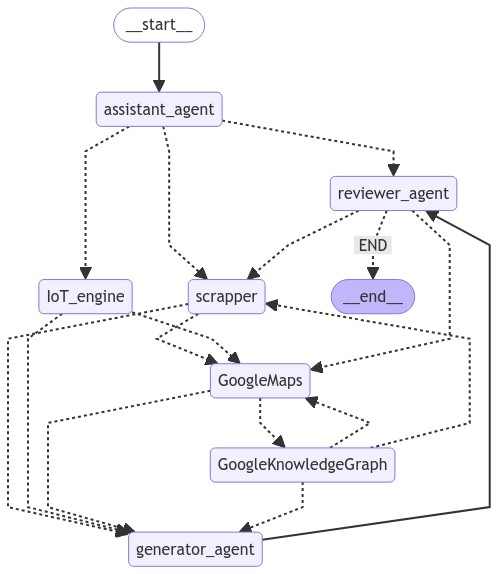

In [3]:
from IPython.display import Image, display

display(Image(runnable.get_graph().draw_mermaid_png()))

In [4]:
# You can add code here to execute the graph or further actions.
thread = {"configurable": {"thread_id": "112a"}}


human_message = HumanMessage(content="I want to drink coffee")
messages = [human_message]

result = runnable.invoke({"messages":messages}, thread)

print(result)

DEBUG    Starting new HTTPS connection (1): api.smith.langchain.com:443
INFO     entering assistant node
DEBUG    Request options: {'method': 'post', 'url': '/openai/v1/chat/completions', 'files': None, 'json_data': {'messages': [{'role': 'system', 'content': '\nAct as an assistant  and answer user queries ONLY if you can \nUser queries may fall into one of the following categories:\n1- Greeting/General: Greeting you or answering a general question that you can ONLY answer.\n2- Service Recommendation: Asking for a recommendation for a service or a place to visit, such as I want to drink coffee, I am looking for a Middle Eastern restaurant, or Do you know any close hospital?\n3- Hard Question: General questions you can\'t answer, such as: who is the current president of the United States of America? Or any question related to current events happening as you don\'t have access to the current event happening right now. the user may ask you to look for it\nYour response must follow the fol

DEBUG    DB path set to G:\My Drive\ontario tech era\python-repo\SensorsConnect\langChain-Course\IoT-Search-Engine\src\vector_db\Vector Database\HNSWLibIndexer_ToDoc__ToDocWithMatchesAndScores_\docs_sqlite.db
INFO - docarray - Connection to DB has been established
INFO     Connection to DB has been established
INFO - docarray - HnswDocumentIndex[ToDoc] has been initialized
INFO     HnswDocumentIndex[ToDoc] has been initialized
DEBUG    Starting new HTTPS connection (1): huggingface.co:443


IoT_engine insde here
user_query:  I want to drink coffee


DEBUG    https://api.smith.langchain.com:443 "GET /info HTTP/1.1" 200 455
DEBUG    https://huggingface.co:443 "HEAD /sentence-transformers/all-mpnet-base-v2/resolve/main/tokenizer_config.json HTTP/1.1" 200 0
DEBUG    https://huggingface.co:443 "HEAD /sentence-transformers/all-mpnet-base-v2/resolve/main/config.json HTTP/1.1" 200 0
DEBUG    https://api.smith.langchain.com:443 "POST /runs/batch HTTP/1.1" 202 33
DEBUG - docarray - Executing `find_batched` for search field embedding
DEBUG    Executing `find_batched` for search field embedding
DEBUG    Services types (top 3 in semantic meaning): ['coffee shop', 'chocolate shop', 'brunch restaurant']
DEBUG    {"message": "Server selection started", "selector": "Primary()", "operation": "find", "topologyDescription": "<TopologyDescription id: 66be3b107ca8745adc0ef7b9, topology_type: ReplicaSetWithPrimary, servers: [<ServerDescription ('ac-zdqhv24-shard-00-00.qrlfpcu.mongodb.net', 27017) server_type: RSSecondary, rtt: 0.05467999999434688>, <Ser

[{'_id': ObjectId('6689db5b24b447e35173597a'), 'Unnamed: 0': 18959, 'Service Type': 'Coffee shop', 'Service Name': 'Second Cup Café', 'Service URL': 'https://www.google.ca/maps/place/Second+Cup+Caf%C3%A9/data=!4m7!3m6!1s0x882b337855be0e3f:0xdf86754554c3e5dc!8m2!3d43.6887769!4d-79.4125784!16s%2Fg%2F1td_5tkv!19sChIJPw6-VXgzK4gR3OXDVEV1ht8?authuser=0&hl=en&rclk=1', 'About': 'Dine-in\n·\nTakeout\n·\nDelivery', 'Service Address': '415 Spadina Rd, Toronto, ON M5P 2W3, Canada', 'Rate': 4.1, 'Monday': {'6 a.m': 0, '7 a.m': 8, '8 a.m': 33, '9 a.m': 66, '10 a.m': 58, '11 a.m': 33, '12 p.m': 25, '1 p.m': 8, '2 p.m': 8, '3 p.m': 0, '4 p.m': 16, '5 p.m': 41, '6 p.m': 75, '7 p.m': 33, '8 p.m': 0, '9 p.m': 0, '10 p.m': 0, '11 p.m': 0}, 'Tuesday': {'6 a.m': 0, '7 a.m': 8, '8 a.m': 16, '9 a.m': 41, '10 a.m': 41, '11 a.m': 16, '12 p.m': 0, '1 p.m': 0, '2 p.m': 0, '3 p.m': 0, '4 p.m': 8, '5 p.m': 33, '6 p.m': 66, '7 p.m': 58, '8 p.m': 0, '9 p.m': 0, '10 p.m': 0, '11 p.m': 0}, 'Wednesday': {'6 a.m': 0, '7

DEBUG    https://api.openrouteservice.org:443 "POST /v2/matrix/driving-car/json HTTP/1.1" 200 None
DEBUG    {'durations': [[156.76, 160.83, 248.13]], 'destinations': [{'location': [-79.412715, 43.688747], 'snapped_distance': 11.48}, {'location': [-79.412857, 43.689088], 'snapped_distance': 13.78}, {'location': [-79.396642, 43.698511], 'snapped_distance': 19.53}], 'sources': [{'location': [-79.403515, 43.690674], 'snapped_distance': 83.32}], 'metadata': {'attribution': 'openrouteservice.org | OpenStreetMap contributors', 'service': 'matrix', 'timestamp': 1723743031428, 'query': {'locations': [[-79.4037579, 43.6914028], [-79.4125784, 43.6887769], [-79.413021, 43.6890519], [-79.3968824, 43.6984848]], 'profile': 'driving-car', 'responseType': 'json', 'sources': ['0'], 'destinations': ['1', '2', '3']}, 'engine': {'version': '8.1.1', 'build_date': '2024-07-17T08:47:22Z', 'graph_date': '2024-07-22T14:32:35Z'}}}
DEBUG    [156.76, 160.83, 248.13]
INFO     NumExpr defaulting to 8 threads.
DEBUG 

{'messages': [HumanMessage(content='I want to drink coffee'), AIMessage(content='{\n  "query-type": "service-recommendation",\n  "service": "coffee",\n  "city": false,\n  "country": false,\n  "address": false,\n  "coordinates": [false, false],\n  "question": "I want to drink coffee"\n}', response_metadata={'token_usage': {'completion_tokens': 59, 'prompt_tokens': 402, 'total_tokens': 461, 'completion_time': 0.046576564, 'prompt_time': 0.0617177, 'queue_time': -0.0014934009999999984, 'total_time': 0.108294264}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'stop', 'logprobs': None}, id='run-885ddacd-b988-42fb-9b16-25090a4c3fc0-0', usage_metadata={'input_tokens': 402, 'output_tokens': 59, 'total_tokens': 461}), ToolMessage(content="{'Unnamed: 0': 18959, 'Service Name': 'Second Cup Café', 'Service URL': 'https://www.google.ca/maps/place/Second+Cup+Caf%C3%A9/data=!4m7!3m6!1s0x882b337855be0e3f:0xdf86754554c3e5dc!8m2!3d43.6887769!4d-79.4125784!16s%2F

DEBUG    https://api.smith.langchain.com:443 "POST /runs/batch HTTP/1.1" 202 33


In [22]:
for i in result:
    print(i)
    print(result[i])

messages
[HumanMessage(content='Who invented the car'), AIMessage(content='{\n  "query-type": "hard-question",\n  "question": "Who invented the car"\n}', response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 389, 'total_tokens': 411, 'completion_time': 0.016610526, 'prompt_time': 0.077772415, 'queue_time': 0.0008423679999999961, 'total_time': 0.094382941}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_af05557ca2', 'finish_reason': 'stop', 'logprobs': None}, id='run-d6257478-000b-4ecd-9349-e4065ea48b26-0', usage_metadata={'input_tokens': 389, 'output_tokens': 22, 'total_tokens': 411}), ToolMessage(content='{\'title\': \'A History of Cars: The Invention of the Automobile - ThoughtCo\', \'url\': \'https://www.thoughtco.com/who-invented-the-car-4059932\', \'content\': "A History of the Automobile\\nThe Evolution of the Car Dates All the Way Back to the 1600s\\nThe very first self-powered road vehicles were powered by steam engines, and by that definition,

In [6]:
result["response"]

"I'd be happy to help you with that! I think I have just the place for you. Have you considered visiting the Second Cup Café? It's a cozy spot with a great atmosphere and a wide variety of coffee drinks to choose from. Plus, it's located in a convenient area with a reasonable travel time from your current location. Would you like to give it a try?"